In [6]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

# Para evitar que salgan los warnings en jupyter
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Pair Programming Encoding

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:
- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.
- Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.
- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
df = pd.read_csv('datos/soci_econ_country_profiles_v5.csv', index_col=0)
df.head(2)

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,-0.431499,-0.793293,0.635685,0.451515,1.176545,-0.146278,0.816818,0.390527,1.373669,-0.170271,-0.433123,-0.072257,139.59,-0.480096,-1.843490,0.739348,0.085614,0.253993,0.085118,1.031920,-1.242902,-0.124619,-0.375346,0.595817,-0.661735,-0.179334,-0.356054,0.526225,0.213117,0.576120,0.983668,-0.481642,0.119029,0.928674
1,Australia,Oceania,1.358804,-0.729591,0.874487,-0.051041,1.039907,0.271660,0.093270,-0.510644,0.436646,1.674834,0.729295,0.579071,176.54,1.024540,-0.270524,0.839394,-0.461542,-0.207625,-1.254411,0.556493,0.080872,1.230619,-0.300239,0.626171,1.061166,-0.270570,1.069555,0.052782,0.675804,0.681506,-0.044663,0.256053,1.643795,1.272043


In [9]:
df["Region"].unique()

array(['SouthAmerica', 'Oceania', 'WesternEurope', 'EasternEurope',
       'SouthernEurope', 'NorthernAmerica', 'EasternAsia', 'WesternAsia',
       'NorthernEurope', 'NorthernAfrica', 'SouthernAsia',
       'South-easternAsia', 'CentralAmerica', 'SouthernAfrica'],
      dtype=object)

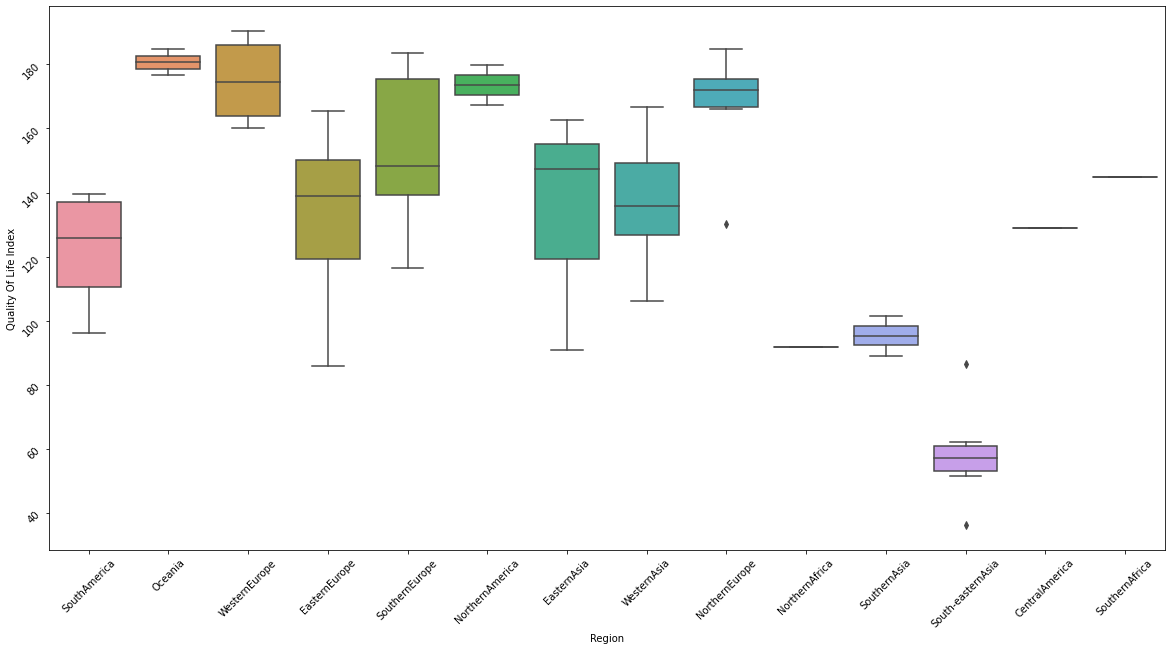

In [13]:
plt.figure(figsize = (20, 10))
sns.boxplot(x= "Region", y = "Quality Of Life Index", data = df)
plt.tick_params(rotation = 45);

In [18]:
df_grupo1 = df[df["Region"].isin(["Oceania", "WesternEurope", "NorthernAmerica", "NorthernEurope"])]
media_QOL_1 = df_grupo1["Quality Of Life Index"].mean()

In [19]:
df_grupo2 = df[df["Region"].isin(["SouthAmerica", "EasternEurope", "SouthernEurope", "EasternAsia", "WesternAsia", "CentralAmerica", "SouthernAfrica"])]
media_QOL_2 = df_grupo2["Quality Of Life Index"].mean()

In [20]:
df_grupo3 = df[df["Region"].isin(["NorthernAfrica", "SouthernAsia", "South-easternAsia"])]
media_QOL_3 = df_grupo3["Quality Of Life Index"].mean()

In [21]:
media_QOL_1 / media_QOL_2

1.2510430874236744

In [22]:
media_QOL_1 / media_QOL_3

2.3052043139620717

In [23]:
media_QOL_2 / media_QOL_3

1.8426258353013851

In [29]:
print(media_QOL_1) #2.3
print(media_QOL_2) #1.84
print(media_QOL_3) #1

172.52777777777774
137.90714285714287
74.84272727272729
